# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# create open lists to store data found
latitude_list = []
longitude_list = []
temperature_list = []
feelslike_list = []
humidity_list = []
pressure_list = []
speed_list = []
cloudiness_list = []
cities_list = []


# singular loop test
#for i in range(1):
# loop through cities list
for i in range(len(cities)):
    # set city for easy coding
    city = cities[i]
    
    # set the url code
    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"

    # make the request
    response = requests.get(url)
    # singular response test
    #print(response.status_code)
    
    # correct response failsafe
    if response.status_code == 200:
        data = response.json()

        try:
            # find the data 
            latitude = data["coord"]["lat"]
            longitude = data["coord"]["lon"]
            temperature = data["main"]["temp"]
            feelslike = data["main"]["feels_like"]
            humidity = data["main"]["humidity"]
            pressure = data["main"]["pressure"]
            speed = data["wind"]["speed"]
            cloudiness = data["clouds"]["all"]
            
            # store the data in lists
            latitude_list.append(latitude)
            longitude_list.append(longitude)
            temperature_list.append(temperature)
            feelslike_list.append(feelslike)
            humidity_list.append(humidity)
            pressure_list.append(pressure)
            speed_list.append(speed)
            cloudiness_list.append(cloudiness)
            cities_list.append(city)
            
            # print for processing city log per instructions
            print(f'Got data for {city}; city index {i} of {len(cities)}')
            
        # print the exception if it comes up
        except Exception as e:
            print(f"Exception: {city}; {e}; city index {i} of {len(cities)}")
    # print the incorrect response code like 404 if it comes up
    else:
        print(f"OpenWeatherAPI issue for {city} with response code {response.status_code}; city index {i} of {len(cities)}")
    
    # slow down API calls
    time.sleep(.25)

Got data for narsaq; city index 0 of 631
Got data for mataura; city index 1 of 631
Got data for bluff; city index 2 of 631
Got data for rikitea; city index 3 of 631
Got data for ushuaia; city index 4 of 631
Got data for oranjemund; city index 5 of 631
Got data for castro; city index 6 of 631
Got data for port hardy; city index 7 of 631
Got data for naberera; city index 8 of 631
Got data for yellowknife; city index 9 of 631
Got data for whitehorse; city index 10 of 631
Got data for albany; city index 11 of 631
Got data for avarua; city index 12 of 631
Got data for kutum; city index 13 of 631
Got data for vardo; city index 14 of 631
Got data for alofi; city index 15 of 631
Got data for warkworth; city index 16 of 631
Got data for chuy; city index 17 of 631
OpenWeatherAPI issue for vaitupu with response code 404; city index 18 of 631
Got data for saint-philippe; city index 19 of 631
Got data for sambava; city index 20 of 631
OpenWeatherAPI issue for barentsburg with response code 404; cit

Got data for port alfred; city index 170 of 631
Got data for la ronge; city index 171 of 631
Got data for alyangula; city index 172 of 631
Got data for souillac; city index 173 of 631
Got data for payakumbuh; city index 174 of 631
Got data for kiama; city index 175 of 631
Got data for carnarvon; city index 176 of 631
Got data for birao; city index 177 of 631
OpenWeatherAPI issue for belushya guba with response code 404; city index 178 of 631
Got data for uinskoye; city index 179 of 631
Got data for wanaka; city index 180 of 631
Got data for vangaindrano; city index 181 of 631
OpenWeatherAPI issue for nizhneyansk with response code 404; city index 182 of 631
Got data for camacha; city index 183 of 631
Got data for lubango; city index 184 of 631
Got data for gualaceo; city index 185 of 631
Got data for riyadh; city index 186 of 631
Got data for novobirilyussy; city index 187 of 631
Got data for sarakhs; city index 188 of 631
Got data for san patricio; city index 189 of 631
Got data for i

Got data for bandarbeyla; city index 340 of 631
Got data for sibi; city index 341 of 631
OpenWeatherAPI issue for longlac with response code 404; city index 342 of 631
Got data for tazmalt; city index 343 of 631
Got data for ugoofaaru; city index 344 of 631
Got data for kieta; city index 345 of 631
OpenWeatherAPI issue for theologos with response code 404; city index 346 of 631
Got data for polis; city index 347 of 631
Got data for davidson; city index 348 of 631
Got data for prince george; city index 349 of 631
Got data for portree; city index 350 of 631
Got data for kahului; city index 351 of 631
Got data for faanui; city index 352 of 631
Got data for chapleau; city index 353 of 631
Got data for matara; city index 354 of 631
Got data for moree; city index 355 of 631
Got data for srednekolymsk; city index 356 of 631
Got data for lincoln; city index 357 of 631
Got data for kesova gora; city index 358 of 631
Got data for itarantim; city index 359 of 631
Got data for amberley; city index

Got data for roma; city index 514 of 631
Got data for manaure; city index 515 of 631
Got data for buenos aires; city index 516 of 631
Got data for nampula; city index 517 of 631
Got data for montecristo; city index 518 of 631
Got data for pandan; city index 519 of 631
Got data for winona; city index 520 of 631
Got data for santa rosa; city index 521 of 631
Got data for sao filipe; city index 522 of 631
Got data for belaya gora; city index 523 of 631
Got data for lethem; city index 524 of 631
Got data for yerbogachen; city index 525 of 631
Got data for dudinka; city index 526 of 631
Got data for makakilo city; city index 527 of 631
Got data for naze; city index 528 of 631
Got data for jiblah; city index 529 of 631
Got data for evensk; city index 530 of 631
Got data for rawson; city index 531 of 631
Got data for wichian buri; city index 532 of 631
Got data for zhengjiatun; city index 533 of 631
Got data for jinchang; city index 534 of 631
Got data for beloha; city index 535 of 631
Got da

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# create the dataframe
df = pd.DataFrame()

# populate with all the lists!
df['city'] = cities_list
df['latitude'] = latitude_list
df['longitude'] = longitude_list
df['temperature'] = temperature_list
df['feels_like'] = feelslike_list
df['humidity'] = humidity_list
df['pressure'] = pressure_list
df['wind_speed'] = speed_list
df['cloudiness'] = cloudiness_list
df.head()

,city,latitude,longitude,temperature,feels_like,humidity,pressure,wind_speed,cloudiness
0,narsaq,60.92,-46.05,30.20,24.53,86,975,2.44,100
1,mataura,-46.19,168.86,55.99,50.72,71,1022,8.01,95
2,bluff,-46.60,168.33,55.99,50.72,71,1022,8.01,77
3,rikitea,-23.12,-134.97,73.09,69.93,78,1017,15.66,89
4,ushuaia,-54.80,-68.30,41.00,19.02,65,1008,32.21,75


In [17]:
# export to csv
df.to_csv(output_data_file, index=False)

In [18]:
df.describe()

,latitude,longitude,temperature,feels_like,humidity,pressure,wind_speed,cloudiness
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,20.412419,17.961338,57.147496,53.386244,73.699828,1014.747856,8.438353,49.346484
std,33.134851,89.719919,22.536409,27.413913,20.620465,8.690748,6.367582,39.637707
min,-54.800000,-175.200000,-16.400000,-25.110000,8.000000,973.000000,0.600000,0.000000
25%,-7.220000,-63.410000,41.785000,31.810000,64.000000,1011.000000,3.455000,1.500000
50%,26.540000,22.790000,61.210000,57.310000,78.000000,1015.000000,6.930000,51.000000
75%,48.025000,100.395000,75.520000,76.350000,89.500000,1021.000000,11.950000,90.000000
max,78.220000,179.320000,102.200000,103.510000,100.000000,1032.000000,34.450000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
# skip, as max humidity = 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

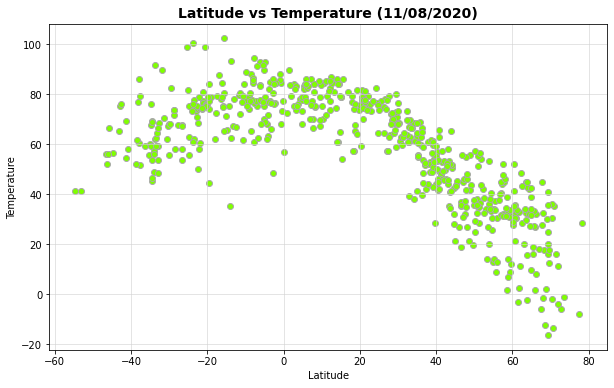

In [53]:
# scatter plot lat v temp
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.temperature, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Latitude vs Temperature (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot

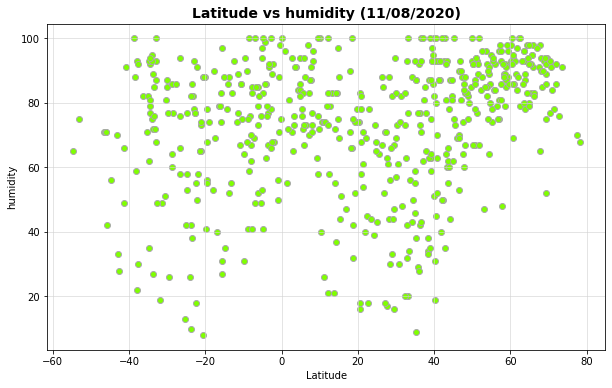

In [54]:
# scatter plot lat v humidity
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.humidity, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Latitude vs humidity (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/lat_hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

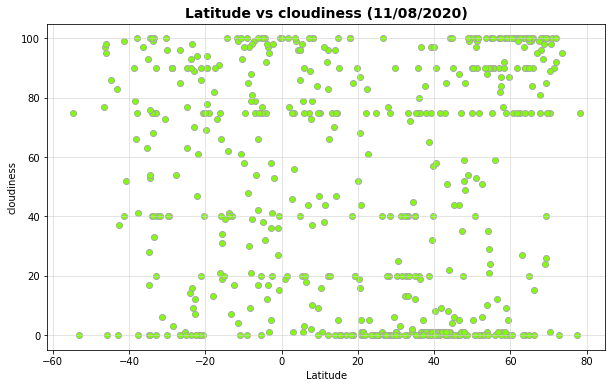

In [55]:
# scatter plot lat v cloudiness
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.cloudiness, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Latitude vs cloudiness (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

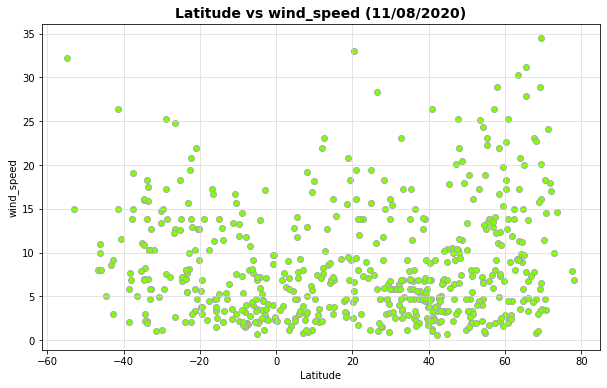

In [56]:
# scatter plot lat v wind_speed
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.wind_speed, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Latitude vs wind_speed (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("wind_speed")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/lat_ws.png')
plt.show()

## Linear Regression

In [30]:
# build hemisphere dataframes
mask = df.latitude > 0
nh_df = df.loc[mask]

mask2 = df.latitude < 0
sh_df = df.loc[mask2]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.8759947299588813.


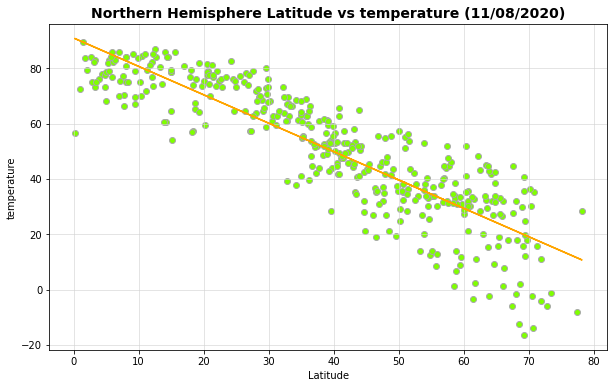

y = -1.0252917333725553x + 90.91582235453733


In [57]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(nh_df.latitude, nh_df.temperature)

print(f"The r value is {r_value}.")

# scatter plot lat v temperature
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(nh_df.latitude, intercept + slope*nh_df.latitude, color='orange')

plt.scatter(nh_df.latitude, nh_df.temperature, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Northern Hemisphere Latitude vs temperature (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("temperature")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/nh_lat_temp.png')
plt.show()

print(f'y = {slope}x + {intercept}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.5084463881620093.


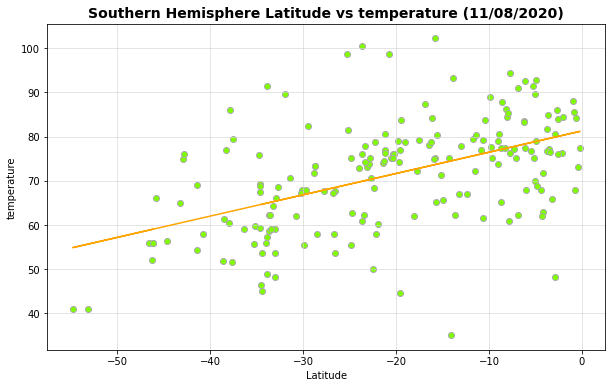

y = 0.4819688553760634x + 81.2866085170934


In [58]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(sh_df.latitude, sh_df.temperature)

print(f"The r value is {r_value}.")

# scatter plot lat v temperature
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(sh_df.latitude, intercept + slope*sh_df.latitude, color='orange')

plt.scatter(sh_df.latitude, sh_df.temperature, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Southern Hemisphere Latitude vs temperature (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("temperature")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/sh_lat_temp.png')
plt.show()

print(f'y = {slope}x + {intercept}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.3172411499214042.


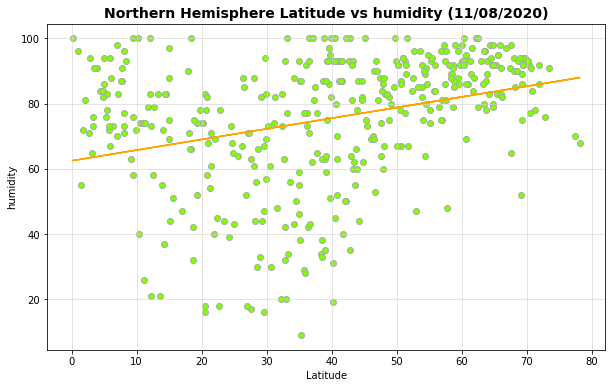

y = 0.3261793175148144x + 62.48221876855424


In [59]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(nh_df.latitude, nh_df.humidity)

print(f"The r value is {r_value}.")

# scatter plot lat v humidity
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(nh_df.latitude, intercept + slope*nh_df.latitude, color='orange')

plt.scatter(nh_df.latitude, nh_df.humidity, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Northern Hemisphere Latitude vs humidity (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/nh_lat_hum.png')
plt.show()

print(f'y = {slope}x + {intercept}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.14378395849662579.


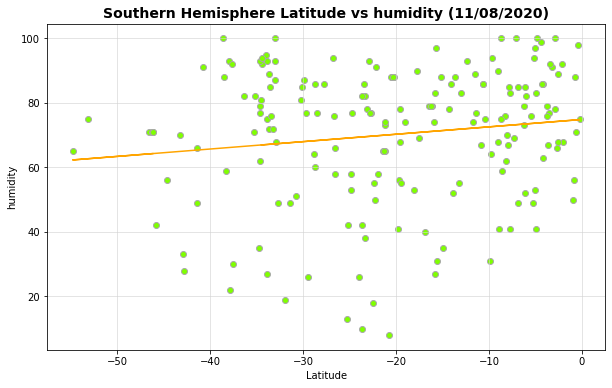

y = 0.22917163510091787x + 74.86638767193847


In [60]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(sh_df.latitude, sh_df.humidity)

print(f"The r value is {r_value}.")

# scatter plot lat v humidity
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(sh_df.latitude, intercept + slope*sh_df.latitude, color='orange')

plt.scatter(sh_df.latitude, sh_df.humidity, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Southern Hemisphere Latitude vs humidity (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/sh_lat_hum.png')
plt.show()

print(f'y = {slope}x + {intercept}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.21171611265140874.


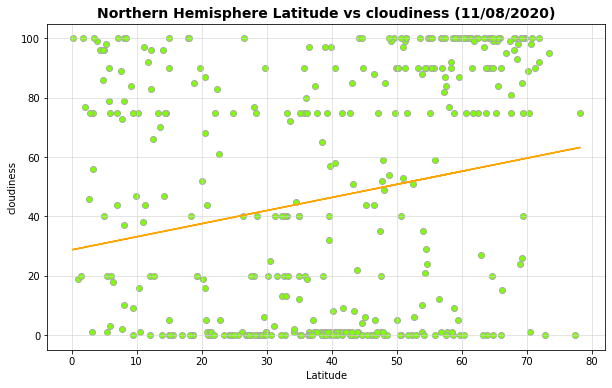

y = 0.44136189002875564x + 28.709297853174807


In [61]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(nh_df.latitude, nh_df.cloudiness)

print(f"The r value is {r_value}.")

# scatter plot lat v cloudiness
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(nh_df.latitude, intercept + slope*nh_df.latitude, color='orange')

plt.scatter(nh_df.latitude, nh_df.cloudiness, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Northern Hemisphere Latitude vs cloudiness (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/nh_lat_cloud.png')
plt.show()

print(f'y = {slope}x + {intercept}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.009170730138676779.


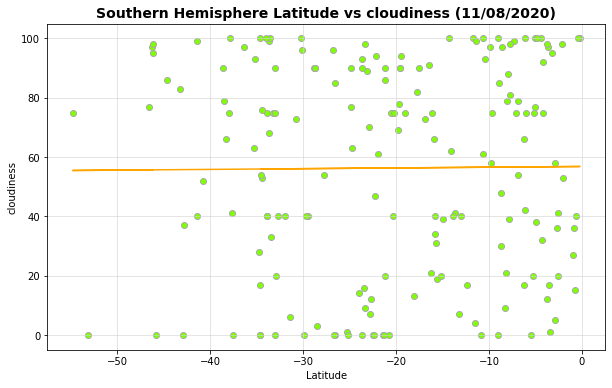

y = 0.024643927346343155x + 56.828448494746205


In [62]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(sh_df.latitude, sh_df.cloudiness)

print(f"The r value is {r_value}.")

# scatter plot lat v cloudiness
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(sh_df.latitude, intercept + slope*sh_df.latitude, color='orange')

plt.scatter(sh_df.latitude, sh_df.cloudiness, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Southern Hemisphere Latitude vs cloudiness (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/sh_lat_cloud.png')
plt.show()

print(f'y = {slope}x + {intercept}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.22132926340284842.


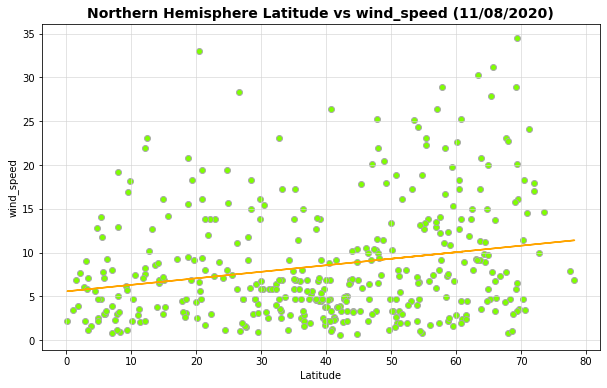

y = 0.07452811088205731x + 5.578309082287575


In [63]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(nh_df.latitude, nh_df.wind_speed)

print(f"The r value is {r_value}.")

# scatter plot lat v wind_speed
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(nh_df.latitude, intercept + slope*nh_df.latitude, color='orange')

plt.scatter(nh_df.latitude, nh_df.wind_speed, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Northern Hemisphere Latitude vs wind_speed (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("wind_speed")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/nh_lat_ws.png')
plt.show()

print(f'y = {slope}x + {intercept}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.36930103828164057.


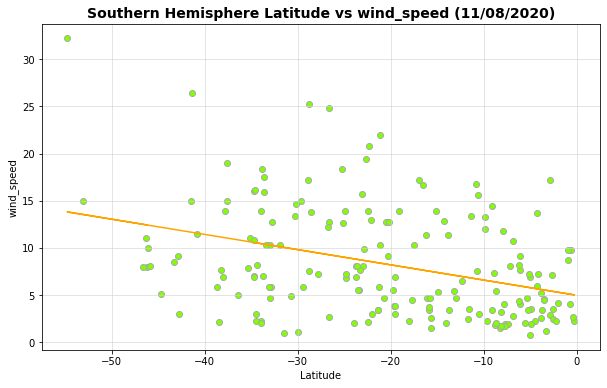

y = -0.16133082011828564x + 4.972359014745715


In [64]:
# get regression stats from linregress
slope, intercept, r_value, p_value, std_err = linregress(sh_df.latitude, sh_df.wind_speed)

print(f"The r value is {r_value}.")

# scatter plot lat v humidity
plt.figure(figsize=(10,6))

# plot the linear regression, thanks to linregress reference
plt.plot(sh_df.latitude, intercept + slope*sh_df.latitude, color='orange')

plt.scatter(sh_df.latitude, sh_df.wind_speed, color = "chartreuse", edgecolors = 'darkgrey')
plt.title("Southern Hemisphere Latitude vs wind_speed (11/08/2020)", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("wind_speed")
plt.grid(color="lightgrey", alpha = 0.75)

plt.savefig('output_data/sh_lat_ws.png')
plt.show()

print(f'y = {slope}x + {intercept}')